In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your dataset
df = pd.read_excel('C:/Users/TomiNordi2m/OneDrive - i2m Unternehmensentwicklung GmbH/Documents/Python/GIANTS Survey Data Analysis/Basic Data Analysis/2024.10.11 GIANTS project_ User and stakeholder needs survey (Responses).xlsx')

In [20]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 322


In [21]:
# Sample data for gender distribution
gender_counts = df['1. Gender'].value_counts()

# Create a condensed pie chart with adjusted width and height
fig = px.pie(
    names=gender_counts.index, 
    values=gender_counts.values, 
    title='Gender Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Built-in color sequence
    width=750,  
    height=750
)

# Aesthetic improvements
fig.update_layout(
    title_text='Gender Distribution',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Clean font
        size=18,  # Set readable font size
        color="black"  # Set font color
    ),
    legend_title_text='Gender',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Hover info customization
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=16            # Adjust label font size
)
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 322


In [22]:
# Sample data for age distribution (assuming the age column is named 'Age')
age_counts = df['2. Age'].value_counts()

# Create a pie chart with the stored preferences
fig = px.pie(
    names=age_counts.index, 
    values=age_counts.values, 
    title='Age Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Age Distribution',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    legend_title_text='Age',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Show hover info with label and percentage
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=16            # Adjust label font size
)

# Display the plot
fig.show()

total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 322


In [23]:

# Convert relevant columns to numeric, forcing errors to NaN (non-numeric values will be replaced with NaN)
df['Adults'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce')
df['Kids'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce')
df['Toddlers'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Toddlers (1-5)]'], errors='coerce')
df['Infants'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Infants (younger than 1)]'], errors='coerce')

# Replace NaN values with 0 (or handle them differently if needed)
df.fillna(0, inplace=True)

# Calculate the total number of people per household by summing across columns
df['Total Household Size'] = df[['Adults', 'Kids', 'Toddlers', 'Infants']].sum(axis=1)

# Create a pie chart based on the total household size distribution
household_size_counts = df['Total Household Size'].value_counts()

# Create the pie chart
fig = px.pie(
    names=household_size_counts.index, 
    values=household_size_counts.values, 
    title='Total Household Size Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Total Household Size Distribution',  
    title_x=0.5,  
    font=dict(
        family="Arial, sans-serif",  
        size=18,  
        color="black"  
    ),
    legend_title_text='Household Size',  
    margin=dict(t=50, b=50, l=50, r=50)  
)

fig.update_traces(
    hoverinfo='label+percent',  
    textinfo='value+percent',   
    textfont_size=16            
)

# Display the plot
fig.show()

total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 322


In [24]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 322


In [25]:


# List of rural cities as provided by you
rural_cities = [
    "Kiruna", "Witzenhausen", "Vorchten", "Kingman", "Crymych", "Zittau",
    "South Harting, Petersfield", "Hope Town, Elbow Cay, Abaco"
]

# Normalize and classify each city
def classify_city(city):
    city = str(city)  # Convert city to string
    if pd.isna(city) or city.strip().lower() in ["n/a", "", "public authority", "i am a private individual"]:
        return "No Response"
    
    # Normalize city name by stripping spaces and using title case
    city_normalized = city.strip().title()
    if city_normalized in [c.title() for c in rural_cities]:
        return "Rural"
    else:
        return "Urban/Suburban"

# Apply the classification function to the city column
df['City Type'] = df['4. City (*If you are completing this survey as a fleet operator, public authority, etc. the primary city of your operations / city you represent)'].apply(classify_city)

# Count occurrences of each category (Urban/Suburban, Rural, No Response)
city_type_counts = df['City Type'].value_counts()

# Create a pie chart based on the classification
fig = px.pie(
    names=city_type_counts.index,
    values=city_type_counts.values,
    title='Urban/Suburban vs Rural vs No Response City Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Preferred color palette
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Urban/Suburban vs Rural',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='City Type',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=16
)

# Display the plot
fig.show()

# Display total number of responses to verify that no rows were dropped
total_responses = df.shape[0]
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [26]:
import plotly.express as px

# Define the custom order for population size categories
population_order = [
    '> 2.000.000', 
    'Between 500.000 and 2.000.000', 
    'Between 150.000 and 500.000', 
    'Between 50.000 and 150.000', 
    'Between 25.000 and 50.000',
    'Between 10.000 and 25.000', 
    'Between 2.000 and 10.000', 
    '< 2.000'
]


# List of responses for population size from the provided data
population_sizes = df['5. What is the population where you live? (*If you are completing this survey as a fleet operator, public authority, etc. the population of the primary city of your operations / city you represent)'].dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_population = pd.DataFrame({'Population Size': population_sizes.index, 'Count': population_sizes.values})

# Filter the DataFrame to only include values in the defined order
df_population = df_population[df_population['Population Size'].isin(population_order)]

# Sort the DataFrame based on the custom order
df_population['Population Size'] = pd.Categorical(df_population['Population Size'], categories=population_order, ordered=True)
df_population = df_population.sort_values('Population Size')

# Create a pie chart based on the population size distribution and order them based on the custom order
fig = px.pie(
    df_population,
    names='Population Size',
    values='Count',
    title='Population Size Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Population Size Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Population Size',
    margin=dict(t=50, b=50, l=50, r=50)
)

# Update the traces to ensure the legend follows the correct order
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=16,
    sort=False  # This ensures that the legend does not get automatically sorted
)




In [27]:

# Assuming the educational question data is in a column, replace 'Educational Column' with the actual column name
education_data = df['7. What is the nearest equivalent to your highest obtained educational degree?'].dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_education = pd.DataFrame({'Education Category': education_data.index, 'Count': education_data.values})

# Create a pie chart based on the education category distribution
fig = px.pie(
    df_education,
    names='Education Category',
    values='Count',
    title='Education Category Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Education Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Education Category',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=16
)



In [28]:

# Replace the column name with the exact text from the dataset
column_name = '10. Please indicate the typical elevation profile of the areas where you drive most frequently. Choose the option that best describes the terrain:'

# Replace '0' values with 'No response'
elevation_data = df[column_name].replace(0, 'No response').dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_elevation = pd.DataFrame({'Elevation Profile': elevation_data.index, 'Count': elevation_data.values})

# Create a pie chart based on the elevation profile distribution
fig = px.pie(
    df_elevation,
    names='Elevation Profile',
    values='Count',
    title='Typical Elevation Profile of Driving Areas',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Typical Elevation Profile of Driving Areas',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Elevation Profile',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=16
)



In [66]:
import plotly.express as px
import pandas as pd

# Replace 'Income Column' with the actual column name from the dataset
income_column = '9.  Estimated annual household (family) income in 2023 in Euros (€/EUR)? (Link to EU Currency Converter)'

# Clean and standardize the income categories
df[income_column] = df[income_column].replace({
    '50000': '40,000 - 75,000€',  # Standardizing 50,000
    '100 000': '75,000 - 125,000€',  # Standardizing 100,000
    '0': 'No response'  # Ensure '0' is treated as 'No response'
})

# Replace NaN values with 'No response'
df[income_column] = df[income_column].fillna('No response')

# Automatically capture the value counts, including 'No response'
income_data = df[income_column].value_counts()

# Define the correct order for the income categories
income_order = [
    'No response', 
    '0 - 2,500€', 
    '2,500 - 5,000€', 
    '5,000 - 10,000€',
    '10,000 - 25,000€',
    '25,000 - 40,000€', 
    '40,000 - 75,000€', 
    '75,000 - 125,000€', 
    '>125,000€'
]

# Convert to a pandas DataFrame for easy manipulation
df_income = pd.DataFrame({'Income Category': income_data.index, 'Count': income_data.values})

# Ensure the DataFrame is ordered according to the custom income order
df_income['Income Category'] = pd.Categorical(df_income['Income Category'], categories=income_order, ordered=True)
df_income = df_income.sort_values('Income Category')

# Create a bar chart based on the income distribution
fig = px.bar(
    df_income,
    x='Income Category',
    y='Count',
    title='Income Distribution',
    color='Income Category',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=1300,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Income Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    xaxis_title="Income Category",
    yaxis_title="Count",
    margin=dict(t=50, b=50, l=50, r=50)
)

# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size

)

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Define the vehicle ownership columns based on the dataset
vehicle_columns = [
    '12. What type and how many vehicles does your household currently own? [Sedan (traditional passenger car)]',
    '12. What type and how many vehicles does your household currently own? [SUV / Truck]',
    '12. What type and how many vehicles does your household currently own? [Three-wheel vehicle]',
    '12. What type and how many vehicles does your household currently own? [Motorcycle / Scooter]',
    '12. What type and how many vehicles does your household currently own? [Cargo bicycle]',
    '12. What type and how many vehicles does your household currently own? [Bicycle]',
    '12. What type and how many vehicles does your household currently own? [E-scooter]',
    '12. What type and how many vehicles does your household currently own? [L5 LEV / Three-wheel vehicle]',
    '12. What type and how many vehicles does your household currently own? [L6/L7 LEV / Four-wheel vehicle]'
]

# Create a subplot grid for the donut charts
fig = make_subplots(
    rows=3, cols=3,  # Adjust the grid size (3x3 in this case)
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],  # All donut charts
           [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
           [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[vehicle.split('[')[1].split(']')[0] for vehicle in vehicle_columns]  # Titles for each chart
)

# Color for the specific vehicle and neutral color for the remaining portion
colors = ['#FF6347', '#D3D3D3']  # Custom color for vehicle and neutral color

# Calculate percentage of ownership for each vehicle type
total_responses = len(df)  # Total number of respondents
row, col = 1, 1

for vehicle in vehicle_columns:
    # Convert to numeric, setting errors='coerce' to handle non-numeric data
    df[vehicle] = pd.to_numeric(df[vehicle], errors='coerce')
    
    # Count the number of respondents who own at least one vehicle
    count_owned = df[vehicle].apply(lambda x: x > 0 if pd.notnull(x) else False).sum()
    
    # Calculate the percentage of ownership
    percentage_owned = (count_owned / total_responses) * 100
    
    # Extract the vehicle type for labeling
    vehicle_type = vehicle.split('[')[1].split(']')[0]
    
    # Add the pie chart to the corresponding subplot position
    fig.add_trace(go.Pie(
        labels=["", ""],  # No labels displayed
        values=[percentage_owned, 100 - percentage_owned],  # Show percentage for vehicle and remaining
        hole=.7,  # Donut effect
        textinfo='percent',  # Show only the percentage
        hoverinfo='label+percent',  # Show label and percentage on hover
        textfont=dict(size=36),  # Set larger font size for the percentage
        marker=dict(colors=colors),  # Apply custom colors
        name=vehicle_type,
        insidetextorientation='horizontal'  # Force the percentage inside the donut hole
    ), row=row, col=col)
    
    # Update subplot position
    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout for the subplots
fig.update_layout(
    title_text="Vehicle Ownership by Type",
    height=800,  # Adjust height for better spacing
    showlegend=False
)

# Copy this code into your VSCode environment to generate the improved donut charts.


In [31]:
# Define a mapping for the categories based on the user's description
transport_categories = {
    'Bicycle': 'Man-Powered Vehicle',
    'Walking': 'Man-Powered Vehicle',
    'Sedan (traditional passenger car)': 'Car',
    'Public Transportation': 'Public Transport',
    'SUV / Truck': 'Car',
    'Cargo bicycle': 'Man-Powered Vehicle',
    'Motorcycle / Scooter': 'Other',
    'Renault Twizy': 'LEV',
    'Public Transportation - Train': 'Public Transport',
    'Public Transportation - Metro/Subway': 'Public Transport',
    'Public Transportation - Bus': 'Public Transport',
    'Pedelec': 'Man-Powered Vehicle',
    'L6/L7 LEV / Four-wheel vehicle': 'LEV',
    'L5 LEV / Three-wheel vehicle': 'LEV',
    'Taxi': 'Car',
    'Coupè Car 2 seats': 'Car',
    'Speedpedelec': 'LEV',
    'Multivan': 'Car',
    'Light Pickup': 'Car',
    'Public transportation - Tram': 'Public Transport',
    'Three-wheel vehicle': 'Other'
}

# Create a new column with the categorized modes of transportation
df['Transport Category'] = df[primary_vehicle_column].map(transport_categories)

# Count the distribution of each transport category
transport_category_distribution = df['Transport Category'].value_counts()

# Display the distribution to understand the results
transport_category_distribution

# Create a pie chart for the categorized transport distribution
fig = go.Figure(data=[go.Pie(labels=transport_category_distribution.index, 
                             values=transport_category_distribution.values, 
                             hole=.3, 
                             textinfo='percent', 
                             marker=dict(colors=px.colors.qualitative.Safe))])

# Update layout for better readability
fig.update_layout(
    title_text="Primary Mode of Transport",
    height=500,
    width=700
)

# Show the plot
fig.show()


NameError: name 'primary_vehicle_column' is not defined

In [58]:
import plotly.express as px

# Define the multi-select column
multi_select_column = '16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'

# Define the explicit possible answers, ensuring "Typical day trips" is handled properly
possible_answers = [
    "Typical day trips (shopping, appointments, etc.)",
    "Taking kids to/from school",
    "Local trips",
    "To/From work/school/commuting",
    "Travel/leisure/holiday (mid-to long distance)",
    "Vehicle is my work tool (for passenger transport)",
    "Vehicle is my work tool (for cargo/delivery)",
]

# Initialize a dictionary to count the occurrences of each answer and add an "Other" category
answer_counts = {answer: 0 for answer in possible_answers}
answer_counts["Other"] = 0  # For responses not matching the predefined answers

# Iterate through each row and count occurrences
for response in df[multi_select_column].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers:
        if answer in response:
            answer_counts[answer] += 1
            matched = True
    if not matched:
        answer_counts["Other"] += 1

# Convert the answer counts into a pandas series for easier plotting
answer_distribution = pd.Series(answer_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (answer_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    answer_distribution,
    x=answer_distribution.index,
    y=answer_distribution.values,
    labels={'x': 'Answer', 'y': 'Count'},
    title='Primary Mode Usage',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(answer_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [57]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '21. How do you generally use your secondary mode of transportation? (Multiple answers allowed.)'

# Define the explicit possible answers for Question 17
possible_answers_17 = [
    "Typical day trips (shopping, appointments, etc.)",
    "Taking kids to/from school",
    "Local trips",
    "To/From work/school/commuting",
    "Travel/leisure/holiday (mid-to long distance)",
    "Vehicle is my work tool (for passenger transport)",
    "Vehicle is my work tool (for cargo/delivery)",

]

# Initialize a dictionary to count the occurrences of each answer and add an "Other" category
answer_counts_17 = {answer: 0 for answer in possible_answers_17}
answer_counts_17["Other"] = 0  # For responses not matching the predefined answers

# Iterate through each row and count occurrences
for response in df[question_17_column].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers_17:
        if answer in response:
            answer_counts_17[answer] += 1
            matched = True
    if not matched:
        answer_counts_17["Other"] += 1

# Convert the answer counts into a pandas series for easier plotting
answer_distribution_17 = pd.Series(answer_counts_17).sort_values(ascending=False)

# Calculate percentages
total_responses_17 = len(df)
percentages_17 = (answer_distribution_17 / total_responses_17) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    answer_distribution_17,
    x=answer_distribution_17.index,
    y=answer_distribution_17.values,
    labels={'x': 'Answer', 'y': 'Count'},
    title='Secondary Mode Usage',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(answer_distribution_17.values, percentages_17)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [56]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '17. In what conditions/context do you normally choose this transport mode?  (Multiple answers allowed.)'

# Define categories and their corresponding keywords
categories = {
    "Weather-related": ["Good weather", "Bad weather"],
    "All conditions/ Personal preference": ["All conditions / personal preference"],
    "Local trips": ["Local trips"],
    "Longer trips": ["Longer trips"],
    "More passengers": ["More passengers"],
    "Less passengers": ["Less passengers"],
    "Connecting to another mode": ["Connecting to another mode of transport"],
}

# Initialize a dictionary to count occurrences
category_counts = {category: 0 for category in categories}
category_counts["Other"] = 0  # For responses not matching any predefined category

# Iterate through each response and categorize
for response in df[question_17_column].dropna():
    response = str(response)  # Convert to string
    matched = False
    for category, keywords in categories.items():
        if any(keyword in response for keyword in keywords):
            category_counts[category] += 1
            matched = True
    if not matched:
        category_counts["Other"] += 1

# Convert the category counts into a pandas series for easier plotting
category_distribution = pd.Series(category_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (category_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    category_distribution,
    x=category_distribution.index,
    y=category_distribution.values,
    labels={'x': 'Context', 'y': 'Count'},
    title='Primary Mode Transport Context',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(category_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [55]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '22. In what conditions/context do you normally choose this transport mode?  (Multiple answers allowed.)'

# Define categories and their corresponding keywords
categories = {
    "Weather-related": ["Good weather", "Bad weather"],
    "All conditions/ Personal preference": ["All conditions / personal preference"],
    "Local trips": ["Local trips"],
    "Longer trips": ["Longer trips"],
    "More passengers": ["More passengers"],
    "Less passengers": ["Less passengers"],
    "Connecting to another mode": ["Connecting to another mode of transport"],
}

# Initialize a dictionary to count occurrences
category_counts = {category: 0 for category in categories}
category_counts["Other"] = 0  # For responses not matching any predefined category

# Iterate through each response and categorize
for response in df[question_17_column].dropna():
    response = str(response)  # Convert to string
    matched = False
    for category, keywords in categories.items():
        if any(keyword in response for keyword in keywords):
            category_counts[category] += 1
            matched = True
    if not matched:
        category_counts["Other"] += 1

# Convert the category counts into a pandas series for easier plotting
category_distribution = pd.Series(category_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (category_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    category_distribution,
    x=category_distribution.index,
    y=category_distribution.values,
    labels={'x': 'Context', 'y': 'Count'},
    title='Secondary Mode Transport Context',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(category_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [61]:
import plotly.express as px

# Replace missing values with "No Response"
df['24. What type of housing do you live in? (relevant for charging infrastructure):'] = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].fillna('No Response')

# Get the counts for each housing type
housing_data = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].value_counts()

# Group the 4 least frequent responses as "Other"
least_frequent = housing_data.nsmallest(4).index
df['24. What type of housing do you live in? (relevant for charging infrastructure):'] = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].replace(least_frequent, 'Other')

# Recalculate the housing data with "Other" grouped
housing_data_grouped = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].value_counts()

# Calculate percentages
total_responses = housing_data_grouped.sum()
percentages = (housing_data_grouped / total_responses) * 100

# Create a horizontal bar chart with both counts and percentages
fig = px.bar(
    housing_data_grouped,
    x=housing_data_grouped.values,
    y=housing_data_grouped.index,
    orientation='h',  # Horizontal orientation
    title='Housing Types',
    labels={'x': 'Count', 'y': 'Housing Type'},
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(housing_data_grouped.values, percentages)]
)

# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)

# Show the chart
fig.show()


In [64]:
import plotly.express as px

# Get the counts for parking spaces
parking_counts = df['25. How many ‘car’ parking spaces do you have available for yourself at your residence (even if used for other type of vehicles, bicycles, etc.)?'].value_counts()

# Create the pie chart with your preferred formatting
fig = px.pie(
    names=parking_counts.index, 
    values=parking_counts.values, 
    title='Distribution of Car Parking Spaces',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Distribution of Car Parking Spaces',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    legend_title_text='Parking Spaces',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Show hover info with label and percentage
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=20            # Adjust label font size
)

# Display the plot
fig.show()

# Print the total number of responses
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [63]:
import plotly.express as px

# Get the counts for each response in question 26
charging_infrastructure_data = df['26. Would you/your building be able to install charging infrastructure at your home?'].value_counts()

# Create the pie chart with your preferred formatting
fig = px.pie(
    names=charging_infrastructure_data.index, 
    values=charging_infrastructure_data.values, 
    title='Charging Infrastructure Installation Feasibility',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Charging Infrastructure Installation Feasibility',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    legend_title_text='Response',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Show hover info with label and percentage
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=20            # Adjust label font size
)

# Show the plot
fig.show()

# Print the total number of responses
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [73]:
import plotly.express as px
import pandas as pd

# Define the explicit answer possibilities and their shortened versions
explicit_answers_59 = {
    'E-Scooter [1 driver, ~125 kg]': 'E-Scooter',
    'E-Bike [1 driver, ~125 kg]': 'E-Bike',
    'E-Bike (cargo) [1 Driver, 1 adult or 2 child passengers, ~250 kg]': 'E-Bike (cargo)',
    'L5 (Passenger): Three-wheel vehicle; capacity: (people+cargo) ≤1000kg, 5 seats (*depends upon local regulations); max speed: N/A': 'L5 Passenger 3-wheel, 5 seats',
    'L5 (Cargo): Three-wheel vehicle; capacity: (people+cargo) ≤1000kg, 2 seats; max speed: N/A': 'L5 Cargo 3-wheel, 2 seats',
    'L6 (Passenger): Light Four-wheel vehicle; capacity (people+cargo) ≤250kg, 2 seats; max speed: 45km/h.': 'L6 Passenger 4-wheel, 2 seats',
    'L6 (Cargo): Light Four-wheel vehicle; capacity (people+cargo) ≤300kg, 2 seats; max speed: 45km/h.': 'L6 Cargo 4-wheel, 2 seats',
    'L7 (Passenger): Heavy Four-wheel vehicle; capacity (people+cargo) ≤450kg, 4 seats; max speed: 90 km/h.': 'L7 Passenger 4-wheel, 4 seats',
    'L7 (Cargo): Heavy Four-wheel vehicle; capacity (people+cargo) ≤1000kg, 2 seats; max speed: 90 km/h.': 'L7 Cargo 4-wheel, 2 seats'
}

# Initialize a dictionary to count occurrences of each shortened answer
answer_counts_59 = {shortened: 0 for shortened in explicit_answers_59.values()}

# Iterate through each response and count occurrences
for response in df['59. If you would invest in an affordable light electric vehicle which category would best suit your mobility needs? (Multiple answers allowed.)'].dropna():
    response = str(response)  # Convert to string to avoid type errors
    for full_answer, shortened in explicit_answers_59.items():
        if full_answer in response:
            answer_counts_59[shortened] += 1

# Total number of respondents
total_responses = len(df)

# Convert the answer counts to a DataFrame for easy plotting, including the percentage
df_treemap = pd.DataFrame({
    'Category': answer_counts_59.keys(),
    'Count': answer_counts_59.values()
})

# Add a 'Percentage' column to the DataFrame
df_treemap['Percentage'] = (df_treemap['Count'] / total_responses) * 100

# Create a custom label that includes both the category name and percentage
df_treemap['Label'] = df_treemap['Category'] + " (" + df_treemap['Percentage'].round(2).astype(str) + "%)"

# Create the treemap
fig = px.treemap(
    df_treemap,
    path=['Label'],  # Use the custom label with percentage
    values='Count',  # Define the count as the values for the treemap
    title='Categories of Light Electric Vehicles Suited for Mobility Needs',
    color_discrete_sequence=px.colors.qualitative.Safe  # Set preferred color palette
)

# Customize layout settings
fig.update_layout(
    title_text='Categories of Light Electric Vehicles Suited for Mobility Needs',
    title_x=0.5,  # Center the title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

# Display the treemap
fig.show()


In [89]:
import plotly.express as px

# Replace '30. What model would best represent your preferred usage of a frugal L5/L6/L7 light electric vehicle?' 
# with the actual column name in your dataframe
question_30_column = '30. What model would best represent your preferred usage of a frugal L5/L6/L7 light electric vehicle?'

# Get the value counts for the responses
question_30_counts = df[question_30_column].value_counts()

# Create a horizontal bar chart with percentages
fig = px.bar(
    question_30_counts,
    x=question_30_counts.values,
    y=question_30_counts.index,
    orientation='h',
    title='Preferred Usage Model for Frugal L5/L6/L7 LEV',
    text_auto='.2s',  # Display values on bars
    color_discrete_sequence=px.colors.qualitative.Safe,  # Preferred color palette
    width=1100,  # Adjust width
    height=700  # Adjust height
)

# Update layout for better spacing and readability
fig.update_layout(
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    xaxis_title="Count",
    yaxis_title="Usage Model",
    margin=dict(t=50, b=100, l=200, r=50),  # Add space for the large bars and labels
    paper_bgcolor="white",  # Set background color
    plot_bgcolor='white',    # White background for the plot area
)

# Add percentage info to the bars
total_responses = question_30_counts.sum()
fig.update_traces(
    texttemplate=[f'{(count/total_responses)*100:.1f}%' for count in question_30_counts.values],
    textposition='outside'
)

# Display the chart
fig.show()

# Print total number of responses for reference
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [145]:
import plotly.express as px
import pandas as pd

# Define the keywords to search for and their shortened versions
keywords_59 = {
    'L5': 'L5 (Three-wheel)',
    'L6': 'L6 (Light Four-wheel)',
    'L7': 'L7 (Heavy Four-wheel)',
    'E-Bike': 'E-Bike',
    'E-Scooter': 'E-Scooter'
}

# Initialize a dictionary to count occurrences of each keyword
keyword_counts_59 = {shortened: 0 for shortened in keywords_59.values()}

# Iterate through each response and count occurrences based on keywords
for response in df['59. If you would invest in an affordable light electric vehicle which category would best suit your mobility needs? (Multiple answers allowed.)'].dropna():
    response = str(response)  # Convert to string to avoid type errors
    for keyword, shortened in keywords_59.items():
        if keyword in response:  # Check if the keyword appears anywhere in the response
            keyword_counts_59[shortened] += 1

# Total number of respondents
total_responses = len(df)

# Convert the keyword counts to a DataFrame for easy plotting, including the percentage
df_treemap = pd.DataFrame({
    'Category': keyword_counts_59.keys(),
    'Count': keyword_counts_59.values()
})

# Add a 'Percentage' column to the DataFrame
df_treemap['Percentage'] = (df_treemap['Count'] / total_responses) * 100

# Create a custom label that includes both the category name and percentage
df_treemap['Label'] = df_treemap['Category'] + " (" + df_treemap['Percentage'].round(2).astype(str) + "%)"

# Create the treemap
fig = px.treemap(
    df_treemap,
    path=['Label'],  # Use the custom label with percentage
    values='Count',  # Define the count as the values for the treemap
    title='Categories of Light Electric Vehicles Suited for Mobility Needs',
    color_discrete_sequence=px.colors.qualitative.Safe  # Set preferred color palette
)

# Customize layout settings
fig.update_layout(
    title_text='Categories of Light Electric Vehicles Suited for Mobility Needs',
    title_x=0.5,  # Center the title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

# Display the treemap
fig.show()


In [99]:
import plotly.express as px
import pandas as pd

# Grouped answers for easier representation
grouped_answers = {
    'Public Transport (Bus, Metro, Train, Taxi)': [
        'Replace public transportation - Bus', 
        'Replace public transportation - Metro/Subway', 
        'Replace public transportation - Train', 
        'Replace taxi'
    ],
    'Primary Car (ICE or Electric)': [
        'Replace primary car (Internal combustion engine - ICE)', 
        'Replace primary car (electric, other)'
    ],
    'Second Car (ICE or Electric)': [
        'Replace second car (ICE)', 
        'Replace second car (electric, other)'
    ],
    'Three-wheelers': [
        'Replace Three-wheeler (ICE)', 
        'Replace Three-wheeler (electric)'
    ],
    'Bicycles (Cargo or Regular)': [
        'Replace bicycle', 
        'Replace cargo bicycle'
    ],
    'Walking': [
        'Replace walking'
    ],
    'Scooter / Motorcycle': [
        'Replace scooter / motorcycle'
    ],
    'Add LEV without replacing vehicles': [
        'Add the light electric vehicle to your vehicles without replacing existing vehicles'
    ],
    'None / N/A': [
        'None / N/A'
    ]
}

# Initialize answer counts for each group
answer_counts = {key: 0 for key in grouped_answers.keys()}
answer_counts['No Response'] = 0  # Catch all for ungrouped answers

# Iterate through each response and count occurrences for each group
for response in df['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].dropna():
    response = str(response)  # Ensure the response is a string
    matched = False
    for group, options in grouped_answers.items():
        if any(option in response for option in options):
            answer_counts[group] += 1
            matched = True
    if not matched:
        answer_counts['No Response'] += 1  # For answers that don't fit the predefined groups

# Convert to a DataFrame for plotting
df_answers = pd.DataFrame(list(answer_counts.items()), columns=['Group', 'Count'])

# Calculate percentage of total responses
df_answers['Percentage'] = (df_answers['Count'] / df['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].notna().sum()) * 100

# Create horizontal bar chart
fig = px.bar(
    df_answers,
    x='Count',
    y='Group',
    orientation='h',
    title='Responses to LEV Usage and Vehicle Replacement',
    text='Percentage',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=800,  
    height=600
)

# Update layout for better readability
fig.update_layout(
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=16,  # Set label font size
        color="black"  # Set font color
    ),
    xaxis_title="Count",
    yaxis_title="",
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    plot_bgcolor='white'
)

# Display percentages on bars
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Show the plot
fig.show()


In [100]:
import pandas as pd
import plotly.express as px

# Assuming df is your dataframe and column 'EF' contains the data for question 64
column_64 = '64. What incentives or benefits would motivate you to switch from conventional vehicles to frugal light electric vehicles?'  # Adjust this to the correct column for question 64

# Define the possible answers explicitly
possible_answers = [
    "Lower Operating Costs",
    "Environmental Benefits",
    "Easy parking",
    "Benefits in obtaining parking permit",
    "Access to car-free/Low emissions zone areas",
    "Tax Incentives",
    "None / N/A",
    "Other (Please Specify)"
]

# Initialize a dictionary to store counts
answer_counts_64 = {answer: 0 for answer in possible_answers}

# Count occurrences for each answer
for response in df[column_64].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers:
        if answer in response:
            answer_counts_64[answer] += 1
            matched = True
    if not matched:
        answer_counts_64["Other (Please Specify)"] += 1

# Convert the answer counts to a pandas DataFrame for plotting
df_64 = pd.DataFrame(list(answer_counts_64.items()), columns=['Answer', 'Count'])

# Calculate the percentages
total_responses = len(df[column_64].dropna())
df_64['Percent'] = (df_64['Count'] / total_responses) * 100

# Create the horizontal bar chart with percentages
fig = px.bar(
    df_64,
    x='Count',
    y='Answer',
    orientation='h',
    title='Incentives or Benefits to Switch to Light Electric Vehicles',
    text=df_64['Percent'].apply(lambda x: f'{x:.2f}%'),  # Display percentages on the bars
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=800,
    height=600
)

# Customize the layout
fig.update_layout(
    title_x=0.5,  # Center the title
    font=dict(family="Arial, sans-serif", size=18, color="black"),  # Font settings
    xaxis_title="Count",
    yaxis_title="Incentive / Benefit",
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    showlegend=False,  # Hide the legend
    plot_bgcolor='white'  # Set background color to white
)

# Display the plot
fig.show()

# Print total responses
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [108]:
import plotly.express as px
import pandas as pd

# Define the possible price ranges in order
price_ranges = [
    'Less than 3.500 €', 
    'Between 3.500 and 5.000 €', 
    'Between 5.000 and 7.000 €', 
    'Between 7.000 and 8.000 €', 
    'Between 8.000 and 9.000 €', 
    'Between 9.000 and 10.000 €', 
    'Between 10.000 and 12.000 €', 
    'Between 12.000 and 15.000 €', 
    'Between 15.000 and 18.000 €'
]

# Count the occurrences of each price range in the dataset (replace with actual column name)
price_counts = df['63. If we develop an L5/L6/L7 LEV vehicle that fulfils all your needs/purposes described above OR replace your current vehicle(s), what price range do you estimate as reasonable/affordable within your market in Euros (€/EUR)? (Link to EU currency converter)'].value_counts()

# Reindex the counts based on the defined order of price ranges
price_counts = price_counts.reindex(price_ranges, fill_value=0)

# Calculate percentages
total_responses = price_counts.sum()
percentages = (price_counts / total_responses) * 100

# Create the bar chart
fig = px.bar(
    x=price_counts.index, 
    y=price_counts.values, 
    title='Price Range Estimate for L5/L6/L7 LEV',
    labels={'x': 'Price Range', 'y': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=1400,  
    height=750,
    text=percentages.apply(lambda x: f'{x:.2f}%')  # Add percentage as text on the bars
)

# Update layout for better visualization
fig.update_layout(
    title_text='Price Range Estimate for L5/L6/L7 LEV',  
    title_x=0.5,  
    font=dict(
        family="Arial, sans-serif",  
        size=18,  
        color="black"  
    ),
    xaxis_title="Price Range",  
    yaxis_title="Count",  
    margin=dict(t=50, b=50, l=50, r=50),  
    plot_bgcolor='white',  # Set background color to white
)

# Update traces to display the percentage as text
fig.update_traces(
    textposition='outside',  # Place the text above the bars
    hoverinfo='x+y+text'  # Show category (x) and count (y) on hover
)

# Display the plot
fig.show()

# Print total responses for context
print(f"Total number of responses: {total_responses}")


Total number of responses: 270


In [ ]:
import plotly.express as px
import pandas as pd

# Define the possible price ranges in order
price_ranges = [
    'Less than 3.500 €', 
    'Between 3.500 and 5.000 €', 
    'Between 5.000 and 7.000 €', 
    'Between 7.000 and 8.000 €', 
    'Between 8.000 and 9.000 €', 
    'Between 9.000 and 10.000 €', 
    'Between 10.000 and 12.000 €', 
    'Between 12.000 and 15.000 €', 
    'Between 15.000 and 18.000 €'
]

# Count the occurrences of each price range in the dataset (replace 'Price Column' with actual column name)
price_counts = df['63. If we develop an L5/L6/L7 LEV vehicle that fulfils all your needs/purposes described above OR replace your current vehicle(s), what price range do you estimate as reasonable/affordable within your market in Euros (€/EUR)? (Link to EU currency converter)'].value_counts()

# Reindex the counts based on the defined order of price ranges
price_counts = price_counts.reindex(price_ranges, fill_value=0)

# Create the bar chart
fig = px.bar(
    x=price_counts.index, 
    y=price_counts.values, 
    title='Price Range Estimate for L5/L6/L7 LEV',
    labels={'x': 'Price Range', 'y': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Safe,  # Your preferred color palette
    width=1400,  
    height=750
)

# Update layout for better visualization
fig.update_layout(
    title_text='Price Range Estimate for L5/L6/L7 LEV',  
    title_x=0.5,  
    font=dict(
        family="Arial, sans-serif",  
        size=18,  
        color="black"  
    ),
    xaxis_title="Price Range",  
    yaxis_title="Count",  
    margin=dict(t=50, b=50, l=50, r=50),  
    plot_bgcolor='white',  # Set background color to white
)

# Display the plot
fig.show()

# Print total responses for context
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 322


In [116]:
import pandas as pd

# Assuming df is your original dataframe

# Define the age categories for retirees
retiree_ages = ['60-78', '>78']

# Filter the dataframe for respondents within the retiree age range
df_retiree = df[df['2. Age'].isin(retiree_ages)]

# Define keywords related to work for primary and secondary use filtering
work_related_keywords = ['work', 'commuting']

# Function to check if any of the work-related keywords are present
def not_work_related(usage):
    if pd.isnull(usage):
        return True  # Keep null values (assuming these could be retirees too)
    usage = str(usage)  # Convert to string to avoid errors with numeric entries
    return not any(keyword in usage.lower() for keyword in work_related_keywords)

# Apply the filtering on both primary and secondary usage
df_retiree = df_retiree[df_retiree['16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]
df_retiree = df_retiree[df_retiree['21. How do you generally use your secondary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]

# Get the count of how many people fulfill the retiree criteria
retiree_count = len(df_retiree)

# Output the count
print(f"Number of respondents who fulfill the retiree criteria: {retiree_count}")

# The resulting filtered dataframe `df_retiree` will now contain only retirees


Number of respondents who fulfill the retiree criteria: 30


In [141]:
import plotly.express as px
import pandas as pd

# Grouped answers for easier representation
grouped_answers = {
    'Public Transport (Bus, Metro, Train, Taxi)': [
        'Replace public transportation - Bus', 
        'Replace public transportation - Metro/Subway', 
        'Replace public transportation - Train', 
        'Replace taxi'
    ],
    'Primary Car (ICE or Electric)': [
        'Replace primary car (Internal combustion engine - ICE)', 
        'Replace primary car (electric, other)'
    ],
    'Second Car (ICE or Electric)': [
        'Replace second car (ICE)', 
        'Replace second car (electric, other)'
    ],
    'Three-wheelers': [
        'Replace Three-wheeler (ICE)', 
        'Replace Three-wheeler (electric)'
    ],
    'Bicycles (Cargo or Regular)': [
        'Replace bicycle', 
        'Replace cargo bicycle'
    ],
    'Walking': [
        'Replace walking'
    ],
    'Scooter / Motorcycle': [
        'Replace scooter / motorcycle'
    ],
    'Add LEV without replacing vehicles': [
        'Add the light electric vehicle to your vehicles without replacing existing vehicles'
    ],
    'None / N/A': [
        'None / N/A'
    ]
}

# Initialize answer counts for each group
answer_counts = {key: 0 for key in grouped_answers.keys()}
answer_counts['No Response'] = 0  # Catch all for ungrouped answers

# Iterate through each response and count occurrences for each group
for response in df_retiree['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].dropna():
    response = str(response)  # Ensure the response is a string
    matched = False
    for group, options in grouped_answers.items():
        if any(option in response for option in options):
            answer_counts[group] += 1
            matched = True
    if not matched:
        answer_counts['No Response'] += 1  # For answers that don't fit the predefined groups

# Convert to a DataFrame for plotting
df_answers = pd.DataFrame(list(answer_counts.items()), columns=['Group', 'Count'])

# Calculate percentage of total responses
df_answers['Percentage'] = (df_answers['Count'] / df_retiree['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].notna().sum()) * 100

# Create horizontal bar chart
fig = px.bar(
    df_answers,
    x='Count',
    y='Group',
    orientation='h',
    title='Responses to LEV Usage and Vehicle Replacement',
    text='Percentage',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=800,  
    height=600
)

# Update layout for better readability
fig.update_layout(
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=16,  # Set label font size
        color="black"  # Set font color
    ),
    xaxis_title="Count",
    yaxis_title="",
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    plot_bgcolor='white'
)

# Display percentages on bars
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Show the plot
fig.show()


In [143]:
import plotly.express as px

# Define the multi-select column
multi_select_column = '16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'

# Define the explicit possible answers, ensuring "Typical day trips" is handled properly
possible_answers = [
    "Typical day trips (shopping, appointments, etc.)",
    "Taking kids to/from school",
    "Local trips",
    "To/From work/school/commuting",
    "Travel/leisure/holiday (mid-to long distance)",
    "Vehicle is my work tool (for passenger transport)",
    "Vehicle is my work tool (for cargo/delivery)",
]

# Initialize a dictionary to count the occurrences of each answer and add an "Other" category
answer_counts = {answer: 0 for answer in possible_answers}
answer_counts["Other"] = 0  # For responses not matching the predefined answers

# Iterate through each row and count occurrences
for response in df_retiree[multi_select_column].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers:
        if answer in response:
            answer_counts[answer] += 1
            matched = True
    if not matched:
        answer_counts["Other"] += 1

# Convert the answer counts into a pandas series for easier plotting
answer_distribution = pd.Series(answer_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df_retiree)
percentages = (answer_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    answer_distribution,
    x=answer_distribution.index,
    y=answer_distribution.values,
    labels={'x': 'Answer', 'y': 'Count'},
    title='Primary Mode Usage',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(answer_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


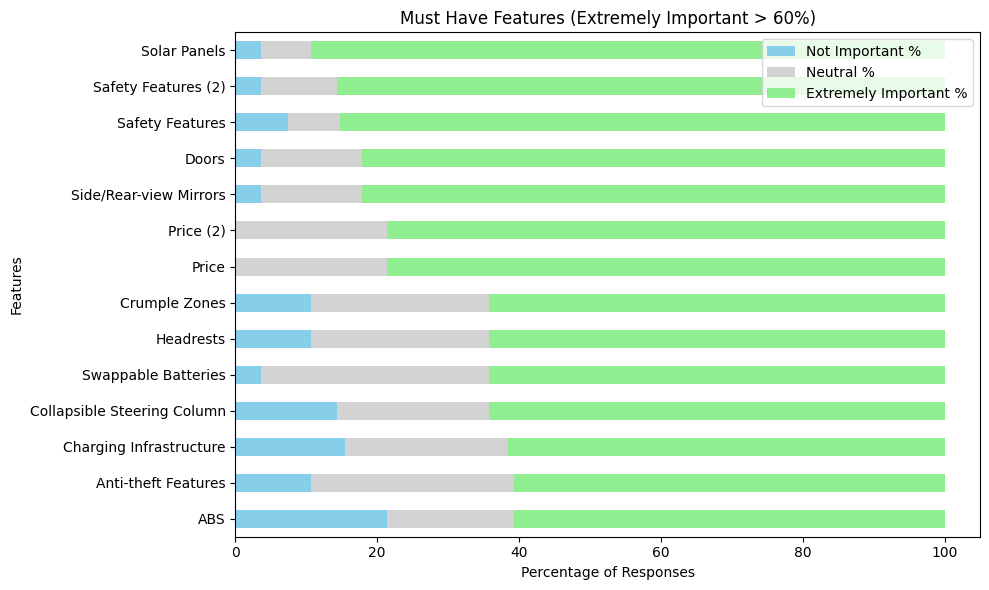

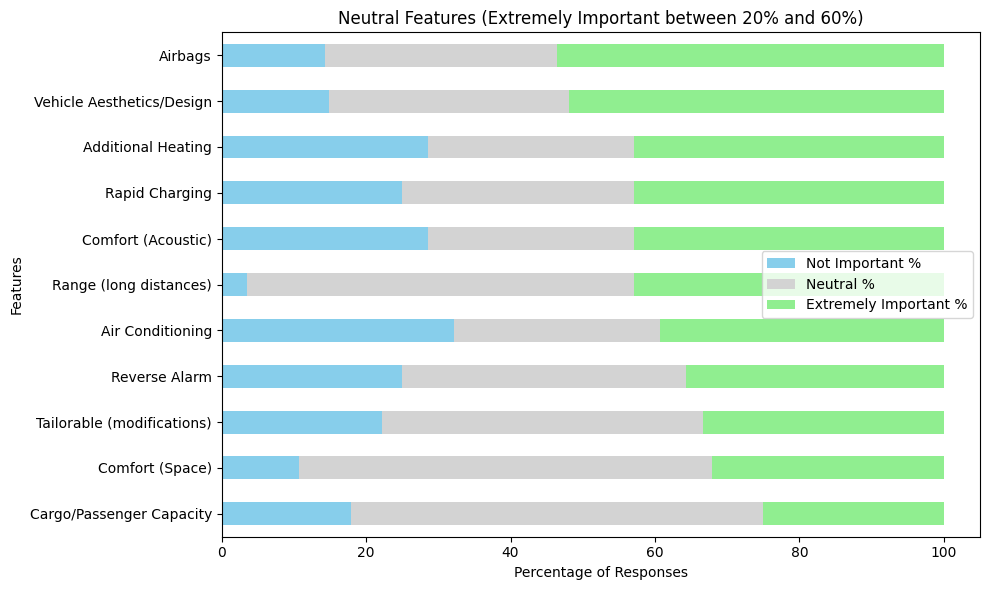

IndexError: index 0 is out of bounds for axis 0 with size 0

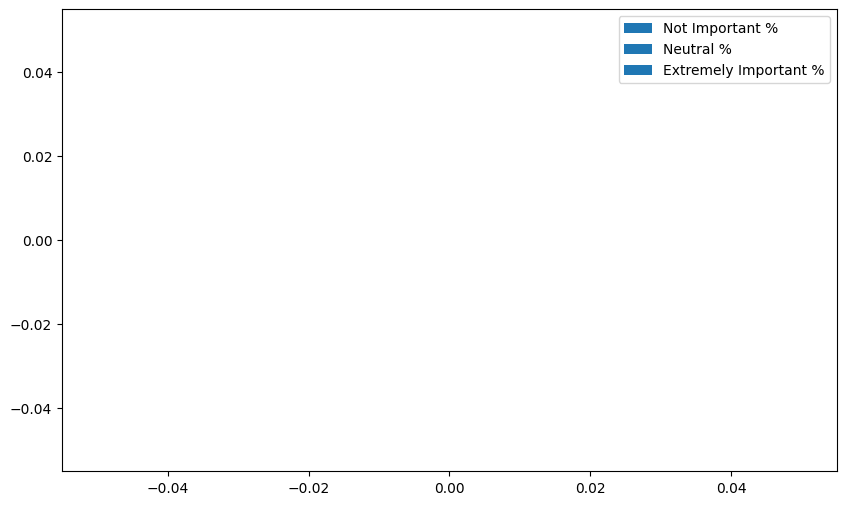

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to categorize the importance rankings into percentages
def calculate_percentages(df_retiree, column):
    categories = {
        'Not Important (1-3)': df_retiree[column].between(1, 3, inclusive='both').sum(),
        'Neutral (4-6)': df_retiree[column].between(4, 6, inclusive='both').sum(),
        'Extremely Important (7-9)': df_retiree[column].between(7, 9, inclusive='both').sum()
    }

    # Calculate the percentage for each category
    total_responses = categories['Not Important (1-3)'] + categories['Neutral (4-6)'] + categories['Extremely Important (7-9)']
    percentages = {k: (v / total_responses) * 100 for k, v in categories.items()}
    return percentages

# Function to create a stacked bar chart with percentages displayed
def plot_stacked_bar(df_ranked, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reverse the order to have the most important features at the top
    df_ranked = df_ranked.iloc[::-1]
    
    # Plot the stacked bars
    df_ranked.set_index('Feature').plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightgray', 'lightgreen'])

    # Add title and labels
    plt.title(title)
    plt.xlabel('Percentage of Responses')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Combine all the feature columns into one list for ranking
all_importance_columns = {**importance_columns_55, **importance_columns_56, **importance_columns_57}

# Rank the features
ranked_features = rank_features_by_importance(all_importance_columns, df_retiree)

# Define cutoffs for grouping the features
must_have_cutoff = 60  # Features with >60% Extremely Important are "Must Have"
neutral_cutoff = 20  # Features with 20-60% Extremely Important are "Neutral"

# Split the ranked features into the three groups based on cutoffs
must_have = ranked_features[ranked_features['Extremely Important %'] > must_have_cutoff]
neutral = ranked_features[(ranked_features['Extremely Important %'] <= must_have_cutoff) & (ranked_features['Extremely Important %'] > neutral_cutoff)]
dont_need = ranked_features[ranked_features['Extremely Important %'] <= neutral_cutoff]

# Plot the three graphs based on these groups
plot_stacked_bar(must_have, 'Must Have Features (Extremely Important > 60%)')
plot_stacked_bar(neutral, 'Neutral Features (Extremely Important between 20% and 60%)')
plot_stacked_bar(dont_need, 'Don\'t Need Features (Extremely Important < 20%)')


In [146]:
import plotly.express as px
import pandas as pd

# Define the keywords to search for and their shortened versions
keywords_59 = {
    'L5': 'L5 (Three-wheel)',
    'L6': 'L6 (Light Four-wheel)',
    'L7': 'L7 (Heavy Four-wheel)',
    'E-Bike': 'E-Bike',
    'E-Scooter': 'E-Scooter'
}

# Initialize a dictionary to count occurrences of each keyword
keyword_counts_59 = {shortened: 0 for shortened in keywords_59.values()}

# Iterate through each response and count occurrences based on keywords
for response in df_retiree['59. If you would invest in an affordable light electric vehicle which category would best suit your mobility needs? (Multiple answers allowed.)'].dropna():
    response = str(response)  # Convert to string to avoid type errors
    for keyword, shortened in keywords_59.items():
        if keyword in response:  # Check if the keyword appears anywhere in the response
            keyword_counts_59[shortened] += 1

# Total number of respondents
total_responses = len(df_retiree)

# Convert the keyword counts to a DataFrame for easy plotting, including the percentage
df_treemap = pd.DataFrame({
    'Category': keyword_counts_59.keys(),
    'Count': keyword_counts_59.values()
})

# Add a 'Percentage' column to the DataFrame
df_treemap['Percentage'] = (df_treemap['Count'] / total_responses) * 100

# Create a custom label that includes both the category name and percentage
df_treemap['Label'] = df_treemap['Category'] + " (" + df_treemap['Percentage'].round(2).astype(str) + "%)"

# Create the treemap
fig = px.treemap(
    df_treemap,
    path=['Label'],  # Use the custom label with percentage
    values='Count',  # Define the count as the values for the treemap
    title='Categories of Light Electric Vehicles Suited for Mobility Needs',
    color_discrete_sequence=px.colors.qualitative.Safe  # Set preferred color palette
)

# Customize layout settings
fig.update_layout(
    title_text='Categories of Light Electric Vehicles Suited for Mobility Needs',
    title_x=0.5,  # Center the title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

# Display the treemap
fig.show()


In [147]:
import pandas as pd

columns_of_interest = [
    'Bicycle infrastructure (<25 km/h)',
    'Local (sub)urban roads (20 – 30 km/h)',
    'Local (built environment / unrestricted speeds) (30 – 50 km/h)',
    'Local public transport - bus',
    'Regional / long distance public transport - bus',
    'Local rail - train',
    'Regional / long distance rail - train',
    'Rural roads / motorways (45 – 70 km/h)',
    'Rural roads / motorways (70 – 90 km/h)',
    'Highway (>90 km/h)'
]

# Aggregate the total hours for each category
aggregated_data = df[columns_of_interest].sum()

# Alternatively, calculate the average for each category
average_data = df[columns_of_interest].mean()

# To display total or average, print or work with the results
print("Total Hours Spent on Each Category:")
print(aggregated_data)

print("\nAverage Hours Spent on Each Category:")
print(average_data)

# If you want to plot the results using Plotly:
import plotly.express as px

# Convert the aggregated data to a DataFrame for plotting
df_plot = pd.DataFrame({
    'Category': columns_of_interest,
    'Total Hours': aggregated_data
})

# Plot the total hours
fig = px.bar(df_plot, x='Category', y='Total Hours', title='Total Hours Spent on Each Type of Infrastructure')
fig.show()


KeyError: "None of [Index(['Bicycle infrastructure (<25 km/h)',\n       'Local (sub)urban roads (20 – 30 km/h)',\n       'Local (built environment / unrestricted speeds) (30 – 50 km/h)',\n       'Local public transport - bus',\n       'Regional / long distance public transport - bus', 'Local rail - train',\n       'Regional / long distance rail - train',\n       'Rural roads / motorways (45 – 70 km/h)',\n       'Rural roads / motorways (70 – 90 km/h)', 'Highway (>90 km/h)'],\n      dtype='object')] are in the [columns]"

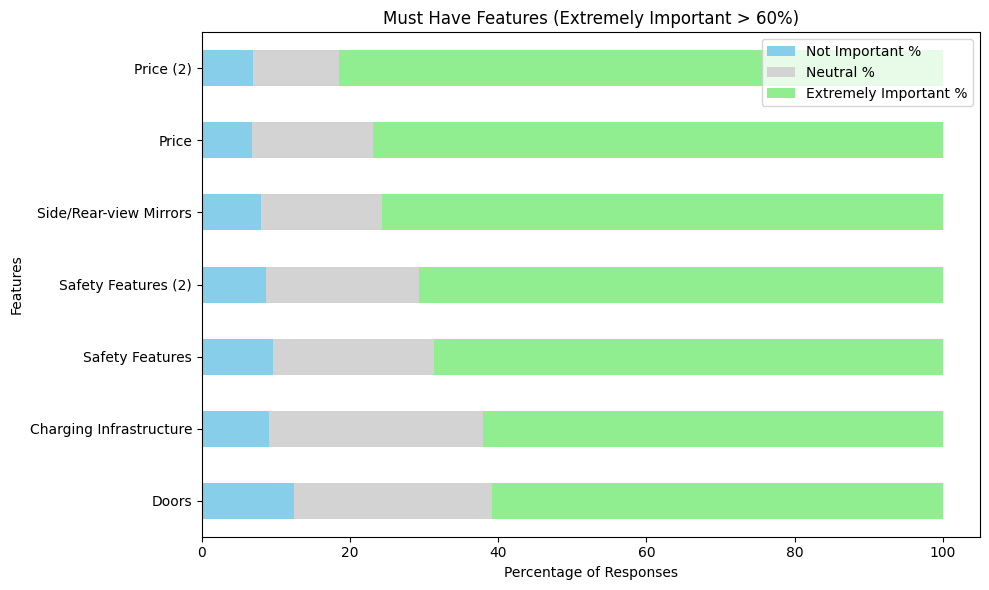

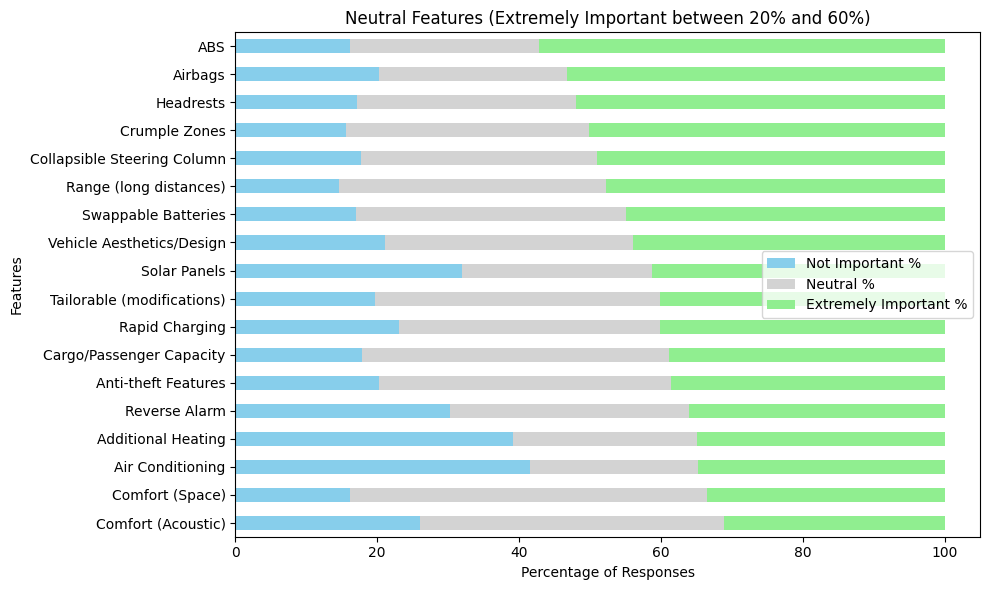

IndexError: index 0 is out of bounds for axis 0 with size 0

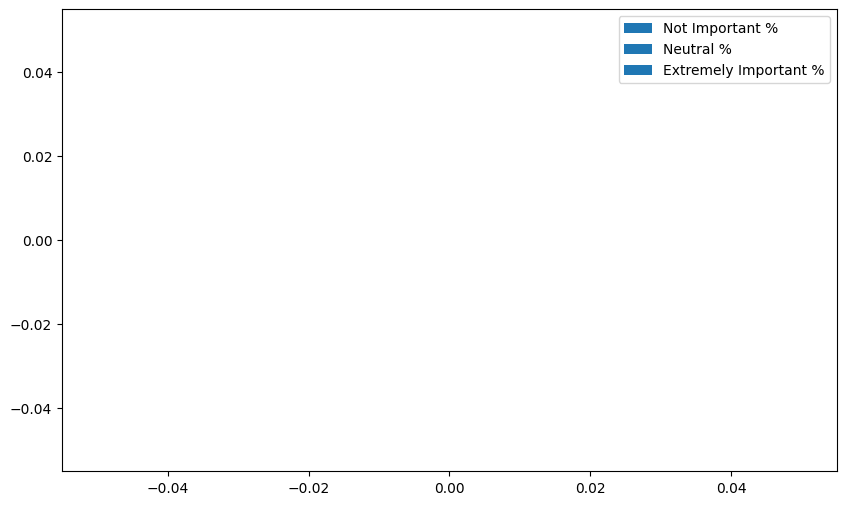

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to categorize the importance rankings into percentages
def calculate_percentages(df, column):
    categories = {
        'Not Important (1-3)': df[column].between(1, 3, inclusive='both').sum(),
        'Neutral (4-6)': df[column].between(4, 6, inclusive='both').sum(),
        'Extremely Important (7-9)': df[column].between(7, 9, inclusive='both').sum()
    }

    # Calculate the percentage for each category
    total_responses = categories['Not Important (1-3)'] + categories['Neutral (4-6)'] + categories['Extremely Important (7-9)']
    percentages = {k: (v / total_responses) * 100 for k, v in categories.items()}
    return percentages

# Function to create a stacked bar chart with percentages displayed
def plot_stacked_bar(df_ranked, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reverse the order to have the most important features at the top
    df_ranked = df_ranked.iloc[::-1]
    
    # Plot the stacked bars
    df_ranked.set_index('Feature').plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightgray', 'lightgreen'])

    # Add title and labels
    plt.title(title)
    plt.xlabel('Percentage of Responses')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Combine all the feature columns into one list for ranking
all_importance_columns = {**importance_columns_55, **importance_columns_56, **importance_columns_57}

# Rank the features
ranked_features = rank_features_by_importance(all_importance_columns, df)

# Define cutoffs for grouping the features
must_have_cutoff = 60  # Features with >60% Extremely Important are "Must Have"
neutral_cutoff = 20  # Features with 20-60% Extremely Important are "Neutral"

# Split the ranked features into the three groups based on cutoffs
must_have = ranked_features[ranked_features['Extremely Important %'] > must_have_cutoff]
neutral = ranked_features[(ranked_features['Extremely Important %'] <= must_have_cutoff) & (ranked_features['Extremely Important %'] > neutral_cutoff)]
dont_need = ranked_features[ranked_features['Extremely Important %'] <= neutral_cutoff]

# Plot the three graphs based on these groups
plot_stacked_bar(must_have, 'Must Have Features (Extremely Important > 60%)')
plot_stacked_bar(neutral, 'Neutral Features (Extremely Important between 20% and 60%)')
plot_stacked_bar(dont_need, 'Don\'t Need Features (Extremely Important < 20%)')
